## Below the rough outlines for the datacluster 
In this notebook the first attempt to make a dataset that is dynamic in time is made.
The data set has to be dynamic in the way that over time the chance that a certain datapoint pops up in a cluster shifts between the clusters. 

#### import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import seaborn as sns
%matplotlib inline


Make first a X amount of clusters in the 2d space to generate strong clusters.

In [2]:
def cluster_centers(N_clusters):
    coordinates = []
    for i in range(N_clusters):
        x = np.random.uniform(0,1000)
        y = np.random.uniform(0,1000)
        coordinates.append([int(i), x,y])
    coordinates = np.array(coordinates)
    return coordinates

In [3]:
centers = cluster_centers(6)

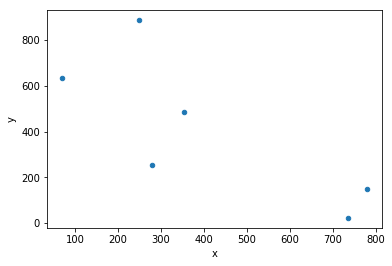

In [4]:
df = pd.DataFrame(centers, columns={'x', 'y', 'cluster_name'})
df.plot(kind='scatter', x='x', y='y')

Make now the clusters so that we can later on draw randomly in time from them

In [6]:
def cluster_creation(centers, cluster_size):
    cluster_coordinates = []
    for i, center in enumerate(centers):
        sig_x = abs(np.random.normal(10, 10))
        sig_y = abs(np.random.normal(10, 10))
        for r in range(cluster_size):
            x = np.random.normal(center[1], sig_x)
            y = np.random.normal(center[2], sig_y)
            cluster_coordinates.append({'cluster_name':i,'x':x, 'y':y})
    return cluster_coordinates

# now we will create a function that puts out which cluster is detected in time
def p_time(N_clusters, centers, dt):
    p_t = []
    clusters_in_time = []
    for t in np.arange(0,100, dt):
        chance = []
        for i in range(len(centers.T[0])):
            chance.append(np.sin((np.pi/N_clusters)*(t + i))**2)
        p = chance/sum(chance)
        p_t.append(p)
        clusters_in_time.append([t, np.random.choice(centers.T[0], p=p)])
    return p_t, clusters_in_time

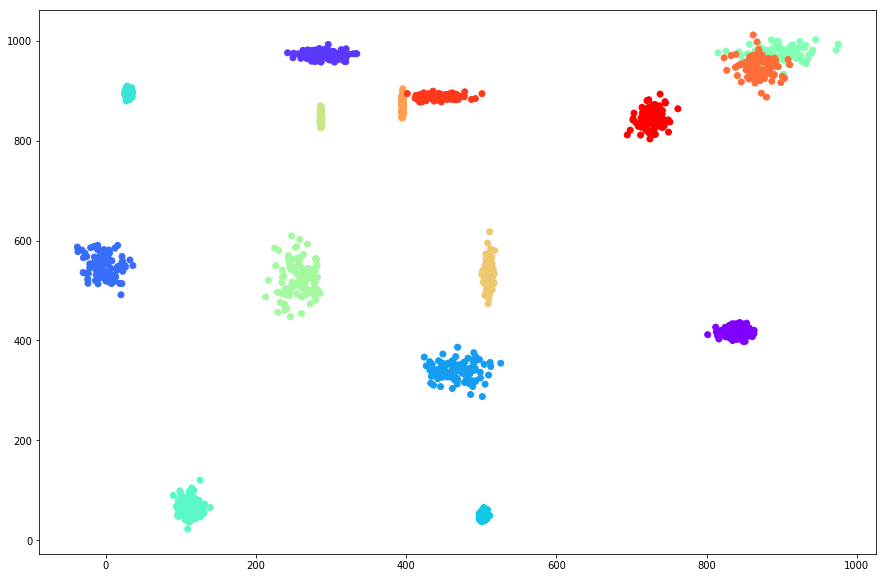

In [24]:
N_clusters = 15
cluster_size = 100
centers = cluster_centers(N_clusters)
cluster_coord = cluster_creation(centers, cluster_size=cluster_size)

df = pd.DataFrame(cluster_coord)
plt.figure(figsize=(15,10))
plt.scatter(df.x, df.y, c=df.cluster_name, cmap = 'rainbow')


time_clusters = p_time(N_clusters, centers, 0.001)[1]

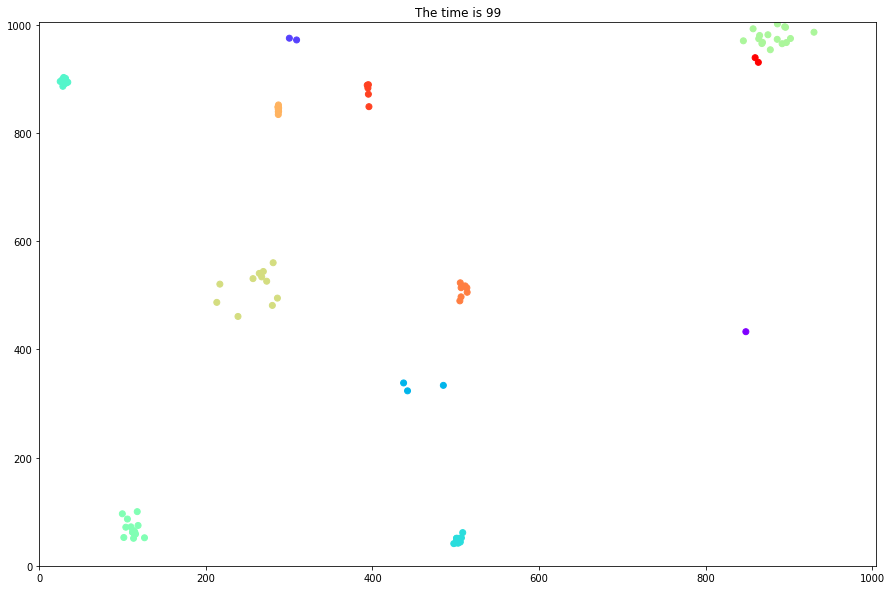

In [25]:
df_tmp = pd.DataFrame()

steps = 10
for i in range(100):
    plt.figure(figsize=(15,10))
    df_tmp = df_tmp.append(df[df['cluster_name'] == time_clusters[i*steps][1]].sample(), ignore_index=True)
    plt.scatter(df_tmp.x, df_tmp.y, c=df_tmp.cluster_name, cmap='rainbow')
    plt.xlim(0,1005)
    plt.ylim(0,1005)
    plt.title('The time is %i'%i)
    display.clear_output(wait=True)
    display.display(pl.gcf())
    #time.sleep(0.001)
    plt.close()

In [ ]:
centers.T[0]